<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap06/6_2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 6.2 Gradient descent**

This notebook recreates the gradient descent algorithm as shown in figure 6.1.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [3]:
# Let's define our model -- just a straight line with intercept phi[0] and slope phi[1]
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [4]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

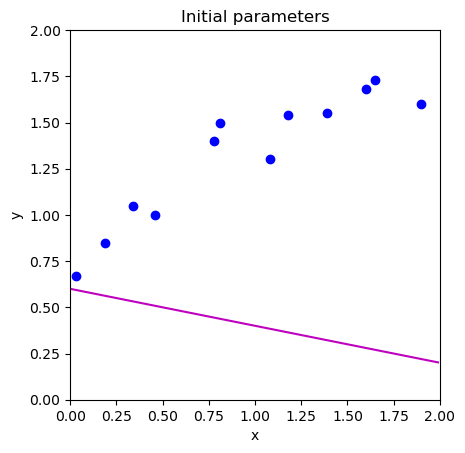

In [5]:
# Initialize the parameters to some arbitrary values and draw the model
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")


Now let's compute the sum of squares loss for the training data

In [6]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Write this function -- replace the line below
  # First make model predictions from data x
  pred_y = model(phi, data_x)
  # Then compute the squared difference between the predictions and true y values
  # Then sum them all and return
  loss = np.sum((pred_y - data_y)**2)
  

  return loss

Let's just test that we got that right

In [7]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

In [8]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept $\phi_{0}$'); ax.set_ylabel('Slope, $\phi_{1}$')
  plt.show()

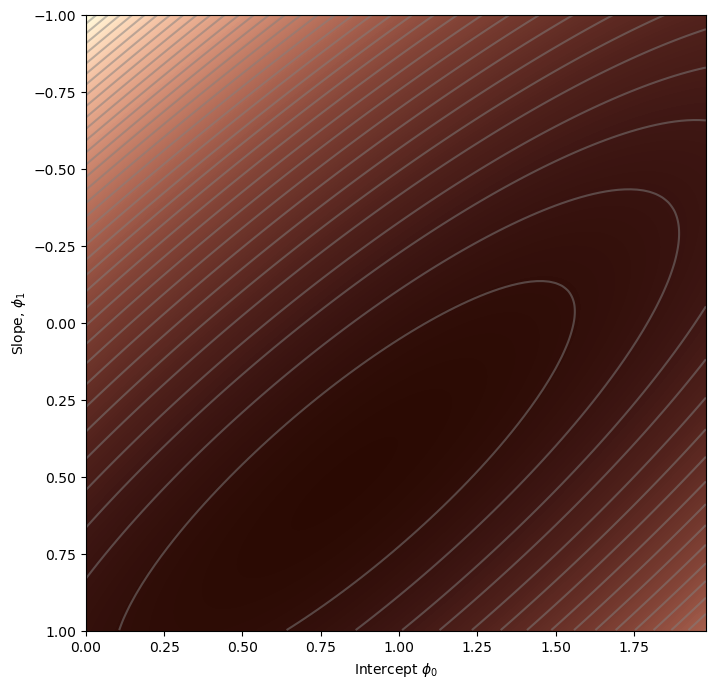

In [9]:
draw_loss_function(compute_loss, data, model)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

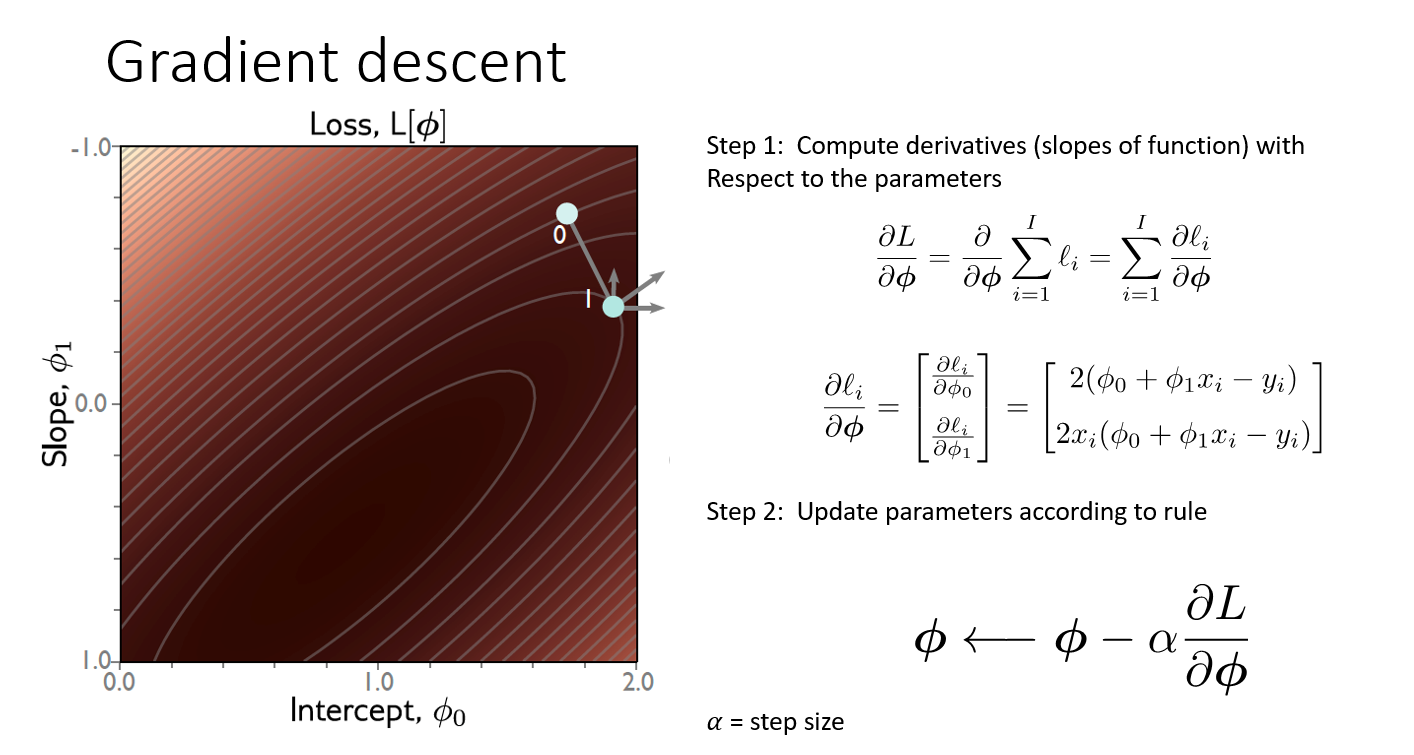

In [10]:
# These are in the lecture slides and notes, but worth trying to calculate them yourself to
# check that you get them right.  Write out the expression for the sum of squares loss and take the
# derivative with respect to phi0 and phi1
def compute_gradient(data_x, data_y, phi):
    # TODO -- write this function, replacing the lines below
    dl_dphi0 = np.sum(2*(phi[0]+phi[1]*data_x - data_y))
    
    dl_dphi1 = np.sum(2*data_x*(phi[0]+phi[1]*data_x - data_y))

    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function two million times, and usually computing the gradients directly is much more efficient.

In [11]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)

print("Your gradients: (%3.3f,%3.3f)"%(gradient[0][0], gradient[1][0]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation


Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


Now we are ready to perform gradient descent.  We'll need to use our line search routine from notebook 6.1, which I've reproduced here plus the helper function loss_function_1D that maps the search along the negative gradient direction in 2D space to a 1D problem (distance along this direction)

In [12]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then halve points B,C, and D
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = b/2
          c = c/2
          d = d/2
          continue;

        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

In [13]:
def gradient_descent_step(phi, data,  model):
  # TODO -- update Phi with the gradient descent step (equation 6.3)
  # 1. Compute the gradient (you wrote this function above)
  grads = compute_gradient(data_x=data[0], data_y=data[1], phi=phi)

  # 2. Find the best step size alpha using line search function (above) -- use negative gradient as going downhill
  alpha = line_search(data, model, phi, grads*-1, verbose=True)

  # 3. Update the parameters phi based on the gradient and the step size alpha.
  phi -= alpha * grads

  return phi

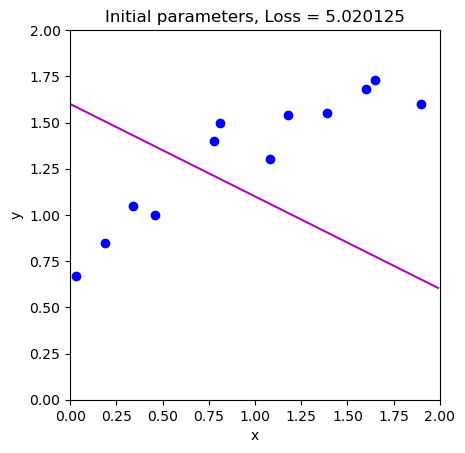

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 5.020125, b3.282064, c10.758588, d28.099335
Iter 2, a=0.000, b=0.022, c=0.044, d=0.066
a 5.020125, b2.837574, c4.750395, d10.758588
Iter 3, a=0.000, b=0.015, c=0.029, d=0.044
a 5.020125, b3.110050, c3.020140, d4.750395
Iter 4, a=0.015, b=0.024, c=0.034, d=0.044
a 3.110050, b2.847870, c3.394651, d4.750395
Iter 5, a=0.015, b=0.021, c=0.028, d=0.034
a 3.110050, b2.845378, c2.940245, d3.394651
Iter 6, a=0.015, b=0.019, c=0.023, d=0.028
a 3.110050, b2.893653, c2.837052, d2.940245
Iter 7, a=0.019, b=0.022, c=0.025, d=0.028
a 2.893653, b2.838164, c2.853695, d2.940245
Iter 8, a=0.019, b=0.021, c=0.023, d=0.025
a 2.893653, b2.848769, c2.835450, d2.853695
Iter 9, a=0.021, b=0.022, c=0.024, d=0.025
a 2.848769, b2.836383, c2.838024, d2.853695
Iter 10, a=0.021, b=0.022, c=0.023, d=0.024
a 2.848769, b2.838953, c2.835371, d2.838024
Iter 11, a=0.022, b=0.022, c=0.023, d=0.024
a 2.838953, b2.835872, c2.835563, d2.838024
Iter 12, a=0.022, b=0.023, c=0.023, d=

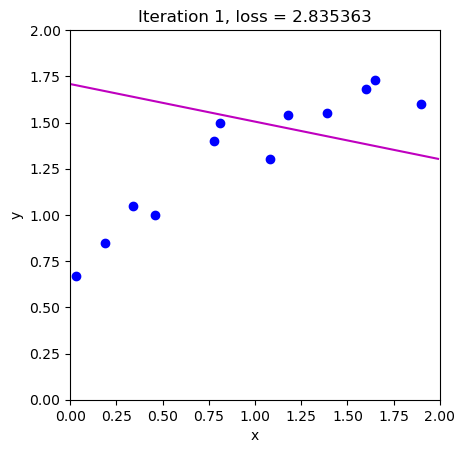

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.835363, b2.175716, c1.782915, d1.657309
Iter 2, a=0.033, b=0.055, c=0.078, d=0.100
a 2.175716, b1.880695, c1.707892, d1.657309
Iter 3, a=0.055, b=0.070, c=0.085, d=0.100
a 1.880695, b1.751913, c1.677451, d1.657309
Iter 4, a=0.070, b=0.080, c=0.090, d=0.100
a 1.751913, b1.696236, c1.664702, d1.657309
Iter 5, a=0.080, b=0.087, c=0.093, d=0.100
a 1.696236, b1.672531, c1.659555, d1.657309
Iter 6, a=0.087, b=0.091, c=0.096, d=0.100
a 1.672531, b1.662688, c1.657614, d1.657309
Iter 7, a=0.091, b=0.094, c=0.097, d=0.100
a 1.662688, b1.658776, c1.656983, d1.657309
Iter 8, a=0.094, b=0.096, c=0.098, d=0.100
a 1.658776, b1.657345, c1.656856, d1.657309
Iter 9, a=0.096, b=0.097, c=0.099, d=0.100
a 1.657345, b1.656914, c1.656902, d1.657309
Iter 10, a=0.097, b=0.098, c=0.099, d=0.100
a 1.656914, b1.656860, c1.656991, d1.657309
Iter 11, a=0.097, b=0.098, c=0.099, d=0.099
a 1.656914, b1.656857, c1.656883, d1.656991
Iter 12, a=0.097, b=0.098, c=0.098, d=0.0

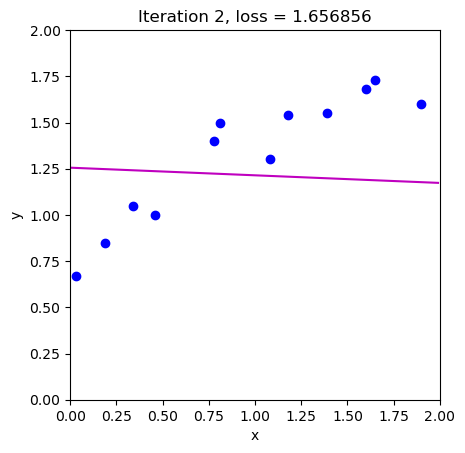

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.656856, b1.135194, c3.338167, d8.457629
Iter 2, a=0.000, b=0.022, c=0.044, d=0.066
a 1.656856, b1.006344, c1.566782, d3.338167
Iter 3, a=0.000, b=0.015, c=0.029, d=0.044
a 1.656856, b1.088632, c1.058607, d1.566782
Iter 4, a=0.015, b=0.024, c=0.034, d=0.044
a 1.088632, b1.008815, c1.168199, d1.566782
Iter 5, a=0.015, b=0.021, c=0.028, d=0.034
a 1.088632, b1.008843, c1.035365, d1.168199
Iter 6, a=0.015, b=0.019, c=0.023, d=0.028
a 1.088632, b1.023627, c1.005871, d1.035365
Iter 7, a=0.019, b=0.022, c=0.025, d=0.028
a 1.023627, b1.006540, c1.010453, d1.035365
Iter 8, a=0.019, b=0.021, c=0.023, d=0.025
a 1.023627, b1.009902, c1.005511, d1.010453
Iter 9, a=0.021, b=0.022, c=0.024, d=0.025
a 1.009902, b1.005938, c1.006121, d1.010453
Iter 10, a=0.021, b=0.022, c=0.023, d=0.024
a 1.009902, b1.006798, c1.005538, d1.006121
Iter 11, a=0.022, b=0.022, c=0.023, d=0.024
a 1.006798, b1.005753, c1.005528, d1.006121
Iter 12, a=0.022, b=0.023, c=0.023, d=0.0

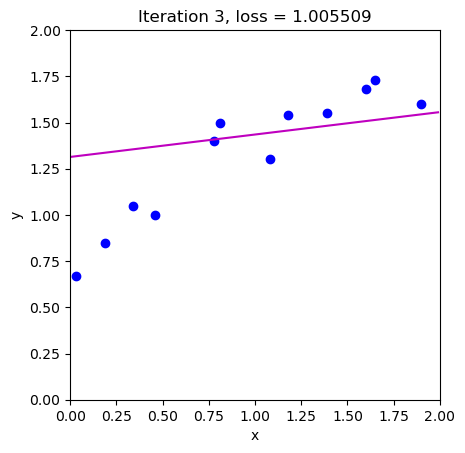

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.005509, b0.803775, c0.685044, d0.649529
Iter 2, a=0.033, b=0.055, c=0.078, d=0.100
a 0.803775, b0.714343, c0.662928, d0.649529
Iter 3, a=0.055, b=0.070, c=0.085, d=0.100
a 0.714343, b0.675842, c0.654237, d0.649529
Iter 4, a=0.070, b=0.080, c=0.090, d=0.100
a 0.675842, b0.659561, c0.650790, d0.649529
Iter 5, a=0.080, b=0.087, c=0.093, d=0.100
a 0.659561, b0.652880, c0.649535, d0.649529
Iter 6, a=0.087, b=0.091, c=0.096, d=0.100
a 0.652880, b0.650279, c0.649162, d0.649529
Iter 7, a=0.091, b=0.094, c=0.097, d=0.100
a 0.650279, b0.649370, c0.649120, d0.649529
Iter 8, a=0.094, b=0.096, c=0.098, d=0.100
a 0.649370, b0.649130, c0.649183, d0.649529
Iter 9, a=0.094, b=0.095, c=0.097, d=0.098
a 0.649370, b0.649177, c0.649115, d0.649183
Iter 10, a=0.095, b=0.096, c=0.097, d=0.098
a 0.649177, b0.649121, c0.649123, d0.649183
Iter 11, a=0.095, b=0.096, c=0.097, d=0.097
a 0.649177, b0.649133, c0.649115, d0.649123
Iter 12, a=0.096, b=0.096, c=0.097, d=0.0

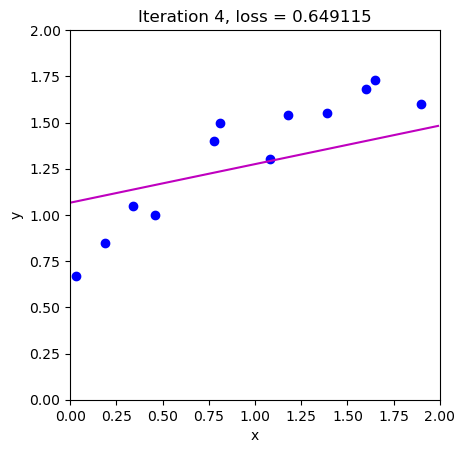

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.649115, b0.489159, c1.154659, d2.703682
Iter 2, a=0.000, b=0.022, c=0.044, d=0.066
a 0.649115, b0.450760, c0.619275, d1.154659
Iter 3, a=0.000, b=0.015, c=0.029, d=0.044
a 0.649115, b0.476115, c0.466168, d0.619275
Iter 4, a=0.015, b=0.024, c=0.034, d=0.044
a 0.476115, b0.451367, c0.499087, d0.619275
Iter 5, a=0.015, b=0.021, c=0.028, d=0.034
a 0.476115, b0.451564, c0.459221, d0.499087
Iter 6, a=0.015, b=0.019, c=0.023, d=0.028
a 0.476115, b0.456169, c0.450538, d0.459221
Iter 7, a=0.019, b=0.022, c=0.025, d=0.028
a 0.456169, b0.450824, c0.451842, d0.459221
Iter 8, a=0.019, b=0.021, c=0.023, d=0.025
a 0.456169, b0.451899, c0.450457, d0.451842
Iter 9, a=0.021, b=0.022, c=0.024, d=0.025
a 0.451899, b0.450623, c0.450604, d0.451842
Iter 10, a=0.022, b=0.023, c=0.024, d=0.025
a 0.450623, b0.450471, c0.450877, d0.451842
Iter 11, a=0.022, b=0.023, c=0.023, d=0.024
a 0.450623, b0.450460, c0.450544, d0.450877
Iter 12, a=0.022, b=0.023, c=0.023, d=0.0

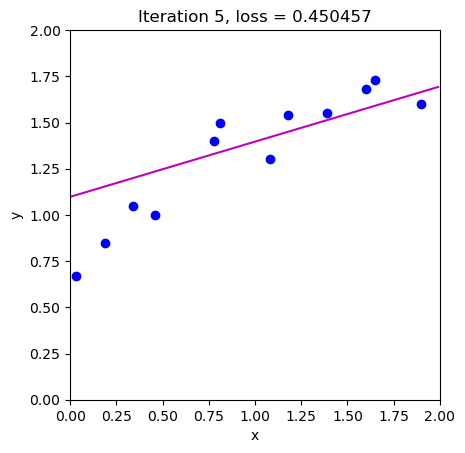

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.450457, b0.387707, c0.350800, d0.339804
Iter 2, a=0.033, b=0.055, c=0.078, d=0.100
a 0.387707, b0.359903, c0.343935, d0.339804
Iter 3, a=0.055, b=0.070, c=0.085, d=0.100
a 0.359903, b0.347943, c0.341243, d0.339804
Iter 4, a=0.070, b=0.080, c=0.090, d=0.100
a 0.347943, b0.342892, c0.340179, d0.339804
Iter 5, a=0.080, b=0.087, c=0.093, d=0.100
a 0.342892, b0.340823, c0.339794, d0.339804
Iter 6, a=0.087, b=0.091, c=0.096, d=0.100
a 0.340823, b0.340022, c0.339682, d0.339804
Iter 7, a=0.091, b=0.094, c=0.097, d=0.100
a 0.340022, b0.339744, c0.339671, d0.339804
Iter 8, a=0.094, b=0.096, c=0.098, d=0.100
a 0.339744, b0.339673, c0.339693, d0.339804
Iter 9, a=0.094, b=0.095, c=0.097, d=0.098
a 0.339744, b0.339686, c0.339669, d0.339693
Iter 10, a=0.095, b=0.096, c=0.097, d=0.098
a 0.339686, b0.339671, c0.339673, d0.339693
Iter 11, a=0.095, b=0.096, c=0.097, d=0.097
a 0.339686, b0.339674, c0.339669, d0.339673
Iter 12, a=0.096, b=0.096, c=0.097, d=0.0

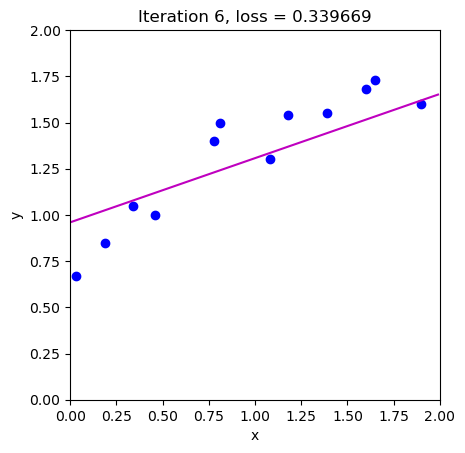

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.339669, b0.289900, c0.496880, d0.978670
Iter 2, a=0.000, b=0.022, c=0.044, d=0.066
a 0.339669, b0.277962, c0.330365, d0.496880
Iter 3, a=0.000, b=0.015, c=0.029, d=0.044
a 0.339669, b0.285852, c0.282751, d0.330365
Iter 4, a=0.015, b=0.024, c=0.034, d=0.044
a 0.285852, b0.278149, c0.292987, d0.330365
Iter 5, a=0.015, b=0.021, c=0.028, d=0.034
a 0.285852, b0.278212, c0.280591, d0.292987
Iter 6, a=0.015, b=0.019, c=0.023, d=0.028
a 0.285852, b0.279646, c0.277892, d0.280591
Iter 7, a=0.019, b=0.022, c=0.025, d=0.028
a 0.279646, b0.277982, c0.278297, d0.280591
Iter 8, a=0.019, b=0.021, c=0.023, d=0.025
a 0.279646, b0.278317, c0.277867, d0.278297
Iter 9, a=0.021, b=0.022, c=0.024, d=0.025
a 0.278317, b0.277919, c0.277913, d0.278297
Iter 10, a=0.022, b=0.023, c=0.024, d=0.025
a 0.277919, b0.277871, c0.277997, d0.278297
Iter 11, a=0.022, b=0.023, c=0.023, d=0.024
a 0.277919, b0.277868, c0.277894, d0.277997
Iter 12, a=0.022, b=0.023, c=0.023, d=0.0

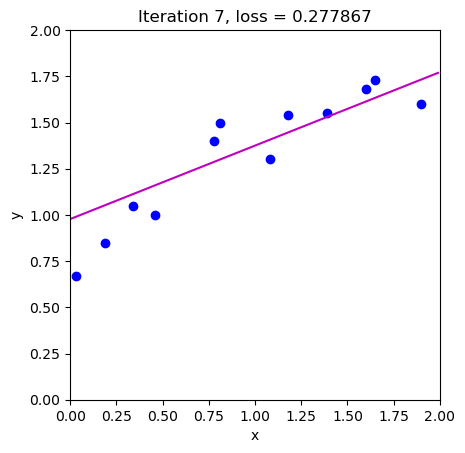

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.277867, b0.258335, c0.246844, d0.243413
Iter 2, a=0.033, b=0.055, c=0.078, d=0.100
a 0.258335, b0.249679, c0.244705, d0.243413
Iter 3, a=0.055, b=0.070, c=0.085, d=0.100
a 0.249679, b0.245953, c0.243865, d0.243413
Iter 4, a=0.070, b=0.080, c=0.090, d=0.100
a 0.245953, b0.244379, c0.243532, d0.243413
Iter 5, a=0.080, b=0.087, c=0.093, d=0.100
a 0.244379, b0.243734, c0.243412, d0.243413
Iter 6, a=0.087, b=0.091, c=0.096, d=0.100
a 0.243734, b0.243483, c0.243376, d0.243413
Iter 7, a=0.091, b=0.094, c=0.097, d=0.100
a 0.243483, b0.243396, c0.243373, d0.243413
Iter 8, a=0.094, b=0.096, c=0.098, d=0.100
a 0.243396, b0.243373, c0.243379, d0.243413
Iter 9, a=0.094, b=0.095, c=0.097, d=0.098
a 0.243396, b0.243378, c0.243372, d0.243379
Iter 10, a=0.095, b=0.096, c=0.097, d=0.098
a 0.243378, b0.243372, c0.243373, d0.243379
Iter 11, a=0.095, b=0.096, c=0.097, d=0.097
a 0.243378, b0.243374, c0.243372, d0.243373
Iter 12, a=0.096, b=0.096, c=0.097, d=0.0

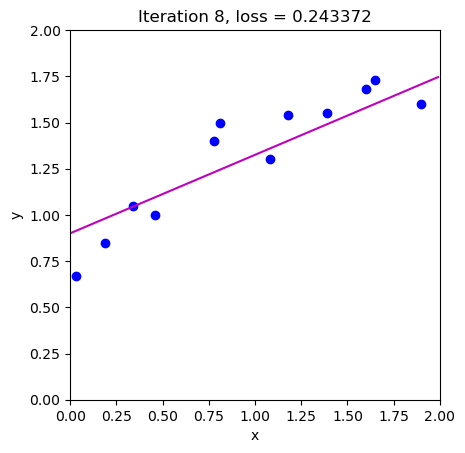

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.243372, b0.227879, c0.292363, d0.442450
Iter 2, a=0.000, b=0.022, c=0.044, d=0.066
a 0.243372, b0.224157, c0.240488, d0.292363
Iter 3, a=0.000, b=0.015, c=0.029, d=0.044
a 0.243372, b0.226613, c0.225651, d0.240488
Iter 4, a=0.015, b=0.024, c=0.034, d=0.044
a 0.226613, b0.224216, c0.228841, d0.240488
Iter 5, a=0.015, b=0.021, c=0.028, d=0.034
a 0.226613, b0.224235, c0.224978, d0.228841
Iter 6, a=0.015, b=0.019, c=0.023, d=0.028
a 0.226613, b0.224681, c0.224136, d0.224978
Iter 7, a=0.019, b=0.022, c=0.025, d=0.028
a 0.224681, b0.224163, c0.224262, d0.224978
Iter 8, a=0.019, b=0.021, c=0.023, d=0.025
a 0.224681, b0.224267, c0.224128, d0.224262
Iter 9, a=0.021, b=0.022, c=0.024, d=0.025
a 0.224267, b0.224144, c0.224142, d0.224262
Iter 10, a=0.022, b=0.023, c=0.024, d=0.025
a 0.224144, b0.224129, c0.224169, d0.224262
Iter 11, a=0.022, b=0.023, c=0.023, d=0.024
a 0.224144, b0.224128, c0.224137, d0.224169
Iter 12, a=0.022, b=0.023, c=0.023, d=0.0

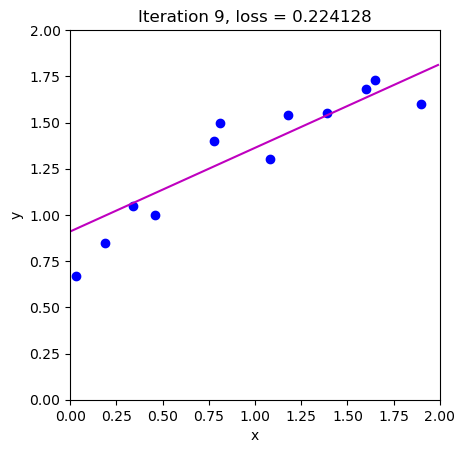

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 0.224128, b0.218053, c0.214481, d0.213418
Iter 2, a=0.033, b=0.055, c=0.078, d=0.100
a 0.218053, b0.215361, c0.213817, d0.213418
Iter 3, a=0.055, b=0.070, c=0.085, d=0.100
a 0.215361, b0.214204, c0.213556, d0.213418
Iter 4, a=0.070, b=0.080, c=0.090, d=0.100
a 0.214204, b0.213716, c0.213454, d0.213418
Iter 5, a=0.080, b=0.087, c=0.093, d=0.100
a 0.213716, b0.213516, c0.213417, d0.213418
Iter 6, a=0.087, b=0.091, c=0.096, d=0.100
a 0.213516, b0.213439, c0.213406, d0.213418
Iter 7, a=0.091, b=0.094, c=0.097, d=0.100
a 0.213439, b0.213412, c0.213405, d0.213418
Iter 8, a=0.094, b=0.096, c=0.098, d=0.100
a 0.213412, b0.213405, c0.213407, d0.213418
Iter 9, a=0.094, b=0.095, c=0.097, d=0.098
a 0.213412, b0.213407, c0.213405, d0.213407
Iter 10, a=0.095, b=0.096, c=0.097, d=0.098
a 0.213407, b0.213405, c0.213405, d0.213407
Iter 11, a=0.095, b=0.096, c=0.097, d=0.097
a 0.213407, b0.213405, c0.213405, d0.213405
Iter 12, a=0.096, b=0.096, c=0.097, d=0.0

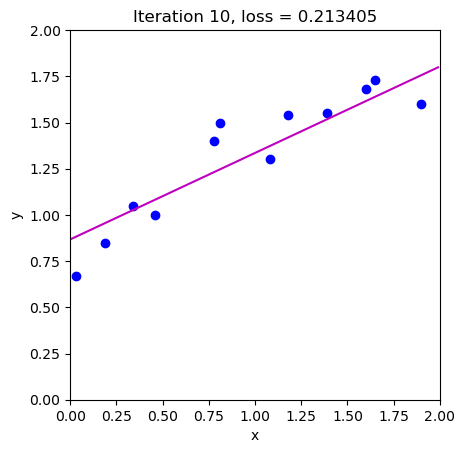

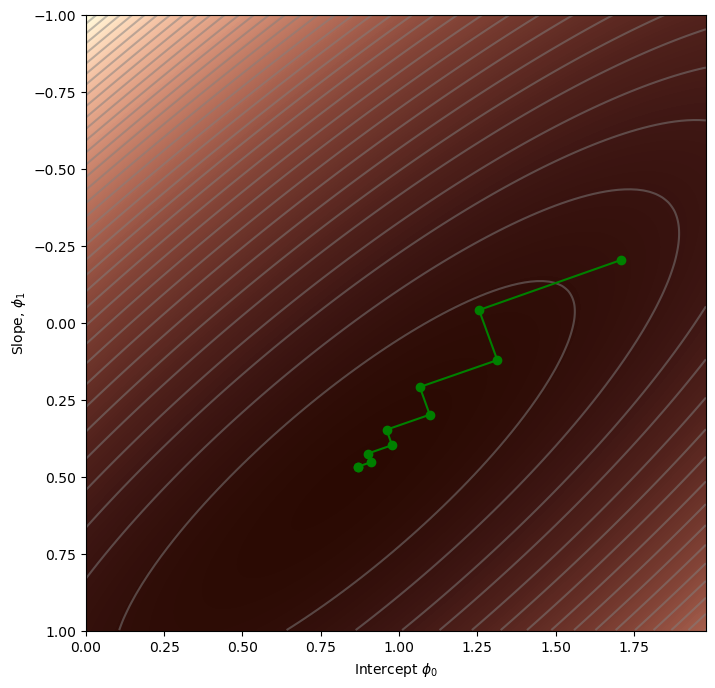

In [14]:
# Initialize the parameters and draw the model
n_steps = 10
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Repeatedly take gradient descent steps
for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Measure loss and draw model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model,phi_all)
